<a href="https://colab.research.google.com/github/OmarAlsaqa/Car_Commands_Classification/blob/master/Car_Commands_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Cleaning**

In [0]:
# load data
filename = 'a.txt'
file = open(filename, 'rt')
text = file.read()
file.close()

# split into sentences
from nltk import sent_tokenize
sentences = sent_tokenize(text)
sentences = str(sentences[0])
#print(sentences)
sentences = sentences.split('\n')
print(sentences)

['open air conditioner', 'open the vent conditioner', 'the open air conditioner', 'open the air exposed conditioner', 'open the air conditioner ', 'close air the conditioner', 'close the conditioner', 'penny pinching the air conditioner', 'close the air snug conditioner', 'close the air conditioner ', 'hot is it open the air conditioner', 'send it is hot open the air conditioner', 'it is hot open the beam conditioner', 'it is hot open the conditioner air', 'it is hot open the air conditioner ', 'cold is it close the air conditioner', 'it is cold close the atmosphere conditioner', 'it is cold close the air conditioner ', 'the set air conditioner to', 'set the conditioner to', 'set the air conditioner to', 'set air the conditioner to', 'set the air conditioner to ', 'set band the tempreture to', 'band set the tempreture to', 'set the tempreture to', 'set to tempreture the', 'set the tempreture to ', 'higher tempreture', 'higher gamy tempreture', 'higher gamy tempreture', 'higher tempretu

In [0]:
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
fuck = []
sente = ''
for sen in sentences:
  for word in sen.split(' '):
    if not word in stop_words:
      sente += word + ' '
  fuck.append(sente)
  sente = ''
final = [q[:-1] for q in fuck]

In [0]:
from pandas import DataFrame

df = DataFrame (final,columns=['cleaned'])
print(df)

                           cleaned
0             open air conditioner
1            open vent conditioner
2             open air conditioner
3     open air exposed conditioner
4            open air conditioner 
...                            ...
1552         dust use wipers clean
1553         dust use wipers clean
1554                         snowy
1555     raining turn along wipers
1556           raining turn wipers

[1557 rows x 1 columns]


In [0]:
df.to_csv(r'q.csv', index = False)

## **Clasiification**

In [0]:
import json as j
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
with open('/content/commands.json') as json_file:
    itemData = j.load(json_file)

In [0]:
data = pd.DataFrame(itemData)

In [0]:
data[0:5]

,stars,text,cleaned
0,ac,open air conditioner,open air conditioner
1,ac,open the vent conditioner,open vent conditioner
2,ac,the open air conditioner,open air conditioner
3,ac,open the air exposed conditioner,open air exposed conditioner
4,ac,open the air conditioner,open air conditioner


In [0]:
stemmer = SnowballStemmer('english')
words = stopwords.words("english")

In [0]:
data['cleaned'] = data['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [0]:
data[0:5]

,stars,text,cleaned
0,ac,open air conditioner,open air condition
1,ac,open the vent conditioner,open vent condition
2,ac,the open air conditioner,open air condition
3,ac,open the air exposed conditioner,open air expos condition
4,ac,open the air conditioner,open air condition


In [0]:
X_train, X_test, y_train, y_test = train_test_split(data['cleaned'], data.stars, test_size=0.2)

In [0]:
pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                     ('chi',  SelectKBest(chi2, k='all')),
                     ('clf', LinearSVC(C=1.0, penalty='l1', max_iter=3000, dual=False))])

In [0]:
model = pipeline.fit(X_train, y_train)

In [0]:
vectorizer = model.named_steps['vect']
chi = model.named_steps['chi']
clf = model.named_steps['clf']

In [0]:
feature_names = vectorizer.get_feature_names()
feature_names = [feature_names[i] for i in chi.get_support(indices=True)]
feature_names = np.asarray(feature_names)

In [0]:
target_names = list(set(data['stars']))
print("top 10 keywords per class:")
for i, label in enumerate(target_names):
    top10 = np.argsort(clf.coef_[i])[-10:]
    print("%s: %s" % (label, " ".join(feature_names[top10])))

top 10 keywords per class:
ac: music fm phil paus em celin today channel player radio
window: degre make cool speed heat cold tempretur temperatur loung condition
lights: help oneself help height heat heart window heart heart heart hide yellow mirror
wipers: stupid stun mystifi sassi quiz smart puzzl good help joke laugh
connect: help oneself help height heat heart window heart heart heart headset seat yellow bluetooth
read: help uncov help oneself help height heat heart window heart heart headset turn yellow connect
answer: global posit restur light mode pin rate navig updat check gps loc
seat: turn read spark luminos ignit bright lumin illumin shine someth light
bluetooth: headset seat headset height read read leger say news say news read news leger
gps: help oneself help height heat heart window heart heart hide gas yellow search devic devic
Radio: conform seat rearward adjust seat buttock degre posterior make seat seat degre headset ahead seat
state: fast ok level motor door tank b

In [0]:
y_pred = model.predict(X_test)

In [0]:
from sklearn.metrics import classification_report
report = classification_report(list(y_test), list(y_pred), labels=list(set(data['stars'])), zero_division =1)
print(report)

              precision    recall  f1-score   support

          ac       0.92      1.00      0.96        44
      window       1.00      0.97      0.99        40
      lights       0.96      0.97      0.96        70
      wipers       1.00      1.00      1.00         3
     connect       1.00      1.00      1.00         1
        read       1.00      0.00      0.00         1
      answer       1.00      0.80      0.89         5
        seat       1.00      0.94      0.97        16
   bluetooth       1.00      1.00      1.00         0
         gps       0.89      0.98      0.93        64
       Radio       1.00      0.97      0.99        37
       state       1.00      0.75      0.86        28
      search       1.00      1.00      1.00         1
      adjust       1.00      1.00      1.00         2

   micro avg       0.95      0.95      0.95       312
   macro avg       0.98      0.89      0.90       312
weighted avg       0.96      0.95      0.95       312



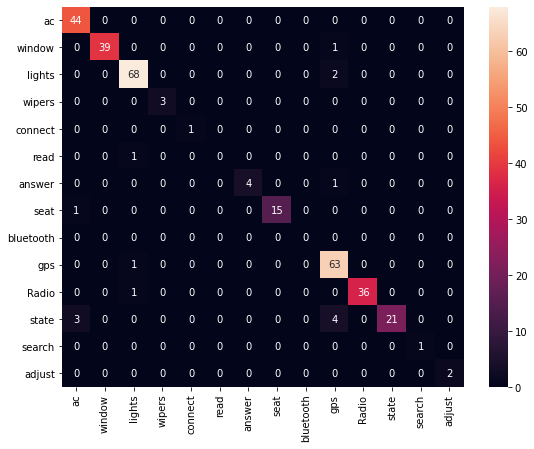

In [0]:
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(list(y_test), list(y_pred), labels= list(set(data['stars'])))

df_cm = pd.DataFrame(matrix,index = [i for i in (list(set(data['stars'])))],columns = [i for i in list(set(data['stars']))])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True)

In [0]:
from sklearn.metrics import accuracy_score
print("accuracy score: " + str(accuracy_score(list(y_test), list(y_pred))*100))

accuracy score: 95.1923076923077


In [0]:
print("accuracy score: " + str(model.score(X_test, y_test)*100))

accuracy score: 95.1923076923077


In [0]:
print(model.predict(['that was an awesome place']))

['gps']


In [0]:
print(model.predict(['there is dust use function wipers to clean it']))

['wipers']


In [0]:
print(model.predict(['turn on the lights']))

['lights']


In [0]:
print(model.predict(['turn on music']))

['Radio']


In [0]:
print(model.predict(['get me the news']))

['Radio']


In [0]:
print(model.predict(['quiz me']))

['answer']


In [0]:
print(model.predict(['connect to device']))

['connect']


In [0]:
print(model.predict(['turn bluetooth the off']))

['bluetooth']


In [0]:
print(model.predict(['ra']))

In [0]:
import pickle

pkl_filename = "textClass_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)